In [77]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform, sample
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [78]:
#Read csv data
csv_data=pd.read_csv("C:\\Data\\Project\\2\\bank-loan.csv")
df=csv_data

In [79]:
#Converting ed and default to classification type
df['ed'] = pd.Categorical(df.ed)
df['default'] = pd.Categorical(df.default)
numeric_index=df[["age","employ","address","income","debtinc","creddebt","othdebt"]] 
cnames=["age","employ","address","income","debtinc","creddebt","othdebt"] 
df.describe

<bound method NDFrame.describe of      age ed  employ  address  income  debtinc   creddebt   othdebt default
0     41  3      17       12     176      9.3  11.359392  5.008608     1.0
1     27  1      10        6      31     17.3   1.362202  4.000798     0.0
2     40  1      15       14      55      5.5   0.856075  2.168925     0.0
3     41  1      15       14     120      2.9   2.658720  0.821280     0.0
4     24  2       2        0      28     17.3   1.787436  3.056564     1.0
..   ... ..     ...      ...     ...      ...        ...       ...     ...
845   34  1      12       15      32      2.7   0.239328  0.624672     NaN
846   32  2      12       11     116      5.7   4.026708  2.585292     NaN
847   48  1      13       11      38     10.8   0.722304  3.381696     NaN
848   35  2       1       11      24      7.8   0.417456  1.454544     NaN
849   37  1      20       13      41     12.9   0.899130  4.389870     NaN

[850 rows x 9 columns]>

In [80]:
#Outlier Analysis
%matplotlib inline  
#plt.boxplot(train_data['var_1'])
for i in numeric_index.columns:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25

    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    df.loc[df[i] < minimum,:i] = np.nan
    df.loc[df[i] > maximum,:i] = np.nan
df.describe

<bound method NDFrame.describe of       age   ed  employ  address  income  debtinc  creddebt   othdebt default
0     NaN  NaN     NaN      NaN     NaN      NaN       NaN  5.008608     1.0
1    27.0    1    10.0      6.0    31.0     17.3  1.362202  4.000798     0.0
2    40.0    1    15.0     14.0    55.0      5.5  0.856075  2.168925     0.0
3     NaN  NaN     NaN      NaN     NaN      2.9  2.658720  0.821280     0.0
4    24.0    2     2.0      0.0    28.0     17.3  1.787436  3.056564     1.0
..    ...  ...     ...      ...     ...      ...       ...       ...     ...
845  34.0    1    12.0     15.0    32.0      2.7  0.239328  0.624672     NaN
846   NaN  NaN     NaN      NaN     NaN      5.7  4.026708  2.585292     NaN
847  48.0    1    13.0     11.0    38.0     10.8  0.722304  3.381696     NaN
848  35.0    2     1.0     11.0    24.0      7.8  0.417456  1.454544     NaN
849  37.0    1    20.0     13.0    41.0     12.9  0.899130  4.389870     NaN

[850 rows x 9 columns]>

In [81]:
#Missing value analysis
df.isnull().sum()
#Dependant variable has 17% missing values and independant variables dont have any missing values
#becoz of the above reason, deciding to skip the rows with missing dependant variable
df=df.dropna()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,27.0,1,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
4,24.0,2,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
5,41.0,2,5.0,5.0,25.0,10.2,0.392700,2.157300,0.0
7,43.0,1,12.0,11.0,38.0,3.6,0.128592,1.239408,0.0
...,...,...,...,...,...,...,...,...,...
695,36.0,2,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,29.0,2,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,33.0,1,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,45.0,1,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [82]:
#feature selection
##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cnames]
df_corr

,age,employ,address,income,debtinc,creddebt,othdebt
1,27.0,10.0,6.0,31.0,17.3,1.362202,4.000798
2,40.0,15.0,14.0,55.0,5.5,0.856075,2.168925
4,24.0,2.0,0.0,28.0,17.3,1.787436,3.056564
5,41.0,5.0,5.0,25.0,10.2,0.392700,2.157300
7,43.0,12.0,11.0,38.0,3.6,0.128592,1.239408
...,...,...,...,...,...,...,...
695,36.0,6.0,15.0,27.0,4.6,0.262062,0.979938
696,29.0,6.0,4.0,21.0,11.5,0.369495,2.045505
697,33.0,15.0,3.0,32.0,7.6,0.491264,1.940736
698,45.0,19.0,22.0,77.0,8.4,2.302608,4.165392


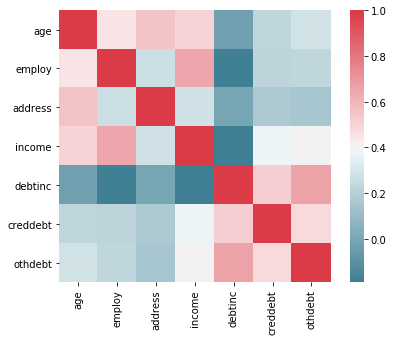

In [83]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [84]:
corr
#Generally co-relation score lying beween -0.8 to +0.8 is considered significant and such columns can be ignored
#Here no such column exists


,age,employ,address,income,debtinc,creddebt,othdebt
age,1.000000,0.454979,0.555676,0.504726,-0.030542,0.225443,0.286482
employ,0.454979,1.000000,0.270728,0.647066,-0.183337,0.223983,0.233297
address,0.555676,0.270728,1.000000,0.282559,-0.005536,0.169991,0.154079
income,0.504726,0.647066,0.282559,1.000000,-0.188884,0.376011,0.409514
debtinc,-0.030542,-0.183337,-0.005536,-0.188884,1.000000,0.526134,0.664822
creddebt,0.225443,0.223983,0.169991,0.376011,0.526134,1.000000,0.482233
othdebt,0.286482,0.233297,0.154079,0.409514,0.664822,0.482233,1.000000


In [85]:
#Normalisation
for i in cnames:
    #minima=df[[cname]].min()
    #maxima=df[[cname]].max()
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

C:\Users\RKrishna\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [86]:
df['default'].value_counts()
#0.0    440
#1.0    142
#The count of samples of 0 and 1 case of default is not equal, hence this is an imbalanced dataset
#ML algorithms may not yield good result, hence sampling is necessary
ones = len(df[df['default']==1])
zeros = len(df[df['default']==0])
index_ones=df[df['default']==1].index
index_zeros=df[df['default']==0].index

In [87]:
ones_sample = df[df['default']==1].sample(zeros, replace=True)
df_zero = df[df['default']==0]
over_sample_df = pd.concat([ones_sample,df_zero], axis=0)
over_sample_class_counts=pd.value_counts(over_sample_df['default'])
#over_sample_class_counts.plot(kind='bar')
#plt.xlabel = 'Class'
#plt.ylabel = 'Frequency'
df = over_sample_df
ones = len(df[df['default']==1])
zeros = len(df[df['default']==0])
print(ones)
print(zeros)

440
440


In [88]:
#Test/Train splitting of data
train, test = train_test_split(df, test_size=0.2)
y_train=train[["default"]]
x_train=train.drop(columns=['default'])
y_test=test[["default"]]
x_test=test.drop(columns=['default'])

In [89]:
train, test = train_test_split(df, test_size=0.2)
#LogisticRegression

y_train=train['default']
x_train=train.iloc[:,0:7]
#print(y)
#type(y)
y_train=y_train.astype('int')
#Regression
scaler = StandardScaler()
x_std = scaler.fit_transform(x_train)

########
clf = LogisticRegression(random_state=0, class_weight='balanced')

# Train model
model = clf.fit(x_std, y_train)

y_test=test['default']
x_test=test.iloc[:,0:7]
#print(y)
y_test=y_test.astype('int')
ynew = model.predict(x_test)
CM = pd.crosstab(y_test, ynew)
#let us save TP, TN, FP, FN

In [90]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_LR=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TNR_LR=TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
Recall_LR=TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FPR_LR=FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_LR=FN*100/(FN+TP)
#FNR_LR
#Accuracy_LR
print("Logistic Regression")
print("Accuracy: "+ str(Accuracy_LR))
print("TNR: "+ str(TNR_LR))
print("TPR: "+ str(Recall_LR))
print("FPR: "+ str(FPR_LR))
print("FNR: "+ str(FNR_LR))

Logistic Regression
Accuracy: 76.70454545454545
TNR: 69.31818181818181
TPR: 84.0909090909091
FPR: 30.681818181818183
FNR: 15.909090909090908


In [91]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(x_test)

#Confusion Matrix
CM = pd.crosstab(y_test, C50_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_DT=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TNR_DT=TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
Recall_DT=TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FPR_DT=FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_DT=FN*100/(FN+TP)
#Accuracy_DT
print("Decision Tree")
print("Accuracy: "+ str(Accuracy_DT))
print("TNR: "+ str(TNR_DT))
print("TPR: "+ str(Recall_DT))
print("FPR: "+ str(FPR_DT))
print("FNR: "+ str(FNR_DT))

Decision Tree
Accuracy: 88.06818181818181
TNR: 76.13636363636364
TPR: 100.0
FPR: 23.863636363636363
FNR: 0.0


In [92]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)
RF_Predictions = RF_model.predict(x_test)

#Confusion Matrix
CM = pd.crosstab(y_test, RF_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_RF=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TNR_RF=TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
Recall_RF=TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FPR_RF=FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_RF=FN*100/(FN+TP)
#Accuracy_DT
print("Decision Tree")
print("Accuracy: "+ str(Accuracy_RF))
print("TNR: "+ str(TNR_RF))
print("TPR: "+ str(Recall_RF))
print("FPR: "+ str(FPR_RF))
print("FNR: "+ str(FNR_RF))

Decision Tree
Accuracy: 87.5
TNR: 79.54545454545455
TPR: 95.45454545454545
FPR: 20.454545454545453
FNR: 4.545454545454546


In [93]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)
NB_Predictions = NB_model.predict(x_test)

#Confusion Matrix
CM = pd.crosstab(y_test, RF_Predictions)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
Accuracy_NB=((TP+TN)*100)/(TP+TN+FP+FN)
#True negative rate
TNR_NB=TN*100/(TN+FP)
#Recall:
#Recall is positive cases correctly identified
Recall_NB=TP*100/(TP+FN)
#False Positive rate:
#Number of false positives predicted:
FPR_NB=FP*100/(FP+TN)
#False Negative rate:
#Number of false negatives predicted
FNR_NB=FN*100/(FN+TP)
#Accuracy_DT
print("Decision Tree")
print("Accuracy: "+ str(Accuracy_NB))
print("TNR: "+ str(TNR_NB))
print("TPR: "+ str(Recall_NB))
print("FPR: "+ str(FPR_NB))
print("FNR: "+ str(FNR_NB))

Decision Tree
Accuracy: 87.5
TNR: 79.54545454545455
TPR: 95.45454545454545
FPR: 20.454545454545453
FNR: 4.545454545454546
